In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/Amazon Sale Report.csv')

<ipython-input-3-056aaa6327c3>:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Amazon Sale Report.csv')


In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44792 entries, 0 to 44791
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               44792 non-null  int64  
 1   Order ID            44792 non-null  object 
 2   Date                44792 non-null  object 
 3   Status              44792 non-null  object 
 4   Fulfilment          44792 non-null  object 
 5   Sales Channel       44792 non-null  object 
 6   ship-service-level  44792 non-null  object 
 7   Style               44792 non-null  object 
 8   SKU                 44792 non-null  object 
 9   Category            44791 non-null  object 
 10  Size                44791 non-null  object 
 11  ASIN                44791 non-null  object 
 12  Courier Status      42168 non-null  object 
 13  Qty                 44791 non-null  float64
 14  currency            42075 non-null  object 
 15  Amount              42075 non-null  float64
 16  ship

In [8]:
df.nunique().to_frame(name='Count of unique values')

,Count of unique values
index,44792
Order ID,41877
Date,28
Status,10
Fulfilment,2
Sales Channel,2
ship-service-level,2
Style,1206
SKU,5561
Category,8


In [9]:
df.apply(pd.unique).to_frame(name='Unique Values')

,Unique Values
index,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
Order ID,"[405-8078784-5731545, 171-9198151-1101146, 404..."
Date,"[04-30-22, 04-29-22, 04-28-22, 04-27-22, 04-26..."
Status,"[Cancelled, Shipped - Delivered to Buyer, Ship..."
Fulfilment,"[Merchant, Amazon]"
Sales Channel,"[Amazon.in, Non-Amazon]"
ship-service-level,"[Standard, Expedited]"
Style,"[SET389, JNE3781, JNE3371, J0341, JNE3671, SET..."
SKU,"[SET389-KR-NP-S, JNE3781-KR-XXXL, JNE3371-KR-X..."
Category,"[Set, kurta, Western Dress, Top, Ethnic Dress,..."


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,44792.0,22395.500000,12930.480966,0.0,11197.75,22395.50,33593.25,44791.0
Qty,44791.0,0.900583,0.330090,0.0,1.00,1.00,1.00,15.0
Amount,42075.0,625.411144,272.267708,0.0,432.00,568.57,771.00,5584.0
ship-postal-code,44778.0,464254.698758,194304.549962,110001.0,380054.00,500020.00,600035.00,989898.0
Unnamed: 22,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  1
Size                      1
ASIN                      1
Courier Status         2624
Qty                       1
currency               2717
Amount                 2717
ship-city                14
ship-state               14
ship-postal-code         14
ship-country             14
promotion-ids         16573
B2B                       1
fulfilled-by          29959
Unnamed: 22           44792
dtype: int64

# Data Cleaning

Drop Columns

In [17]:
df.drop(columns= ['index','Unnamed: 22', 'fulfilled-by', 'ship-country', 'currency', 'Sales Channel '], inplace = True)

Drop Duplicates

In [18]:
df[df.duplicated(['Order ID','ASIN'], keep=False)]

,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
30660,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0.0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
30661,406-0372545-6086735,04-12-22,Cancelled,Amazon,Expedited,SET197,SET197-KR-NP-L,Set,L,B08B3YPD63,Cancelled,0.0,NaN,Siliguri,WEST BENGAL,734008.0,NaN,False
41291,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0.0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False
41292,408-0373839-4433120,04-05-22,Cancelled,Amazon,Expedited,JNE3501,JNE3501-KR-M,kurta,M,B08MYVCDB4,Cancelled,0.0,NaN,BENGALURU,KARNATAKA,560072.0,NaN,False


In [19]:
len(df)-len(df.drop_duplicates(['Order ID','ASIN']))

2

In [20]:
df.drop_duplicates(['Order ID','ASIN'],inplace = True,ignore_index=True)

Filling NaN Values

In [21]:
df['Courier Status'].fillna('no info',inplace=True)

In [22]:
df['promotion-ids'].fillna('no promotion',inplace=True)

In [24]:
df['ship-city'].fillna('no info', inplace = True)
df['ship-state'].fillna('no info', inplace = True)
df['ship-postal-code'].fillna('no info', inplace = True)

In [27]:
df[df['Amount'].isnull()]['Status'].value_counts(normalize=True).apply(lambda x: format(x, '.2%'))

Series([], Name: Status, dtype: float64)

In [28]:
df['Amount'].fillna(0,inplace=True)

Renaming Columns

In [29]:
mapper = {'Order ID':'order_ID', 'Date':'date', 'Status':'ship_status','Fulfilment':'fullfilment',
          'ship-service-level':'service_level', 'Style':'style', 'SKU':'sku', 'Category':'product_category',
          'Size':'size', 'ASIN':'asin', 'Courier Status':'courier_ship_status', 'Qty':'order_quantity',
          'Amount':'order_amount_($)', 'ship-city':'city', 'ship-state':'state', 'ship-postal-code':'zip',
          'promotion-ids':'promotion','B2B':'customer_type'}

In [30]:
df.rename(columns=mapper, inplace =True)

Convert Amount column values to USD

In [31]:
# Assume the exchange rate of 1 INR = 0.012014 USD
exchange_rate = 0.012014
df['order_amount_($)'] = df['order_amount_($)'].apply(lambda x: x * exchange_rate)

Convert other values

In [32]:
df['customer_type'].replace(to_replace=[True,False],value=['business','customer'], inplace=True)

In [33]:
df['date'] = pd.to_datetime(df['date'])

Check the clean data

In [34]:
df.describe(include='all', datetime_is_numeric=True)

,order_ID,date,ship_status,fullfilment,service_level,style,sku,product_category,size,asin,courier_ship_status,order_quantity,order_amount_($),city,state,zip,promotion,customer_type
count,44790,44790,44790,44790,44790,44790,44790,44789,44789,44789,44790,44789.000000,44790.000000,44790,44790,44790.0,44790,44789
unique,41877,NaN,10,2,2,1206,5561,8,11,5557,4,NaN,NaN,4865,57,6502.0,1673,2
top,403-4984515-8861958,NaN,Shipped,Amazon,Expedited,JNE3405,JNE3405-KR-L,Set,L,B081WSCKPQ,Shipped,NaN,NaN,BENGALURU,MAHARASHTRA,201301.0,no promotion,customer
freq,12,NaN,26104,29957,29586,1533,388,18342,7879,388,38234,NaN,NaN,3716,7779,338.0,16571,44452
mean,NaN,2022-04-16 18:16:28.613529856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.900623,7.058238,NaN,NaN,NaN,NaN,NaN
min,NaN,2022-04-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2022-04-10 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,4.793586,NaN,NaN,NaN,NaN,NaN
50%,NaN,2022-04-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,6.595686,NaN,NaN,NaN,NaN,NaN
75%,NaN,2022-04-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,9.118626,NaN,NaN,NaN,NaN,NaN
max,NaN,2022-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,67.086176,NaN,NaN,NaN,NaN,NaN


In [35]:
df.isnull().sum()

order_ID               0
date                   0
ship_status            0
fullfilment            0
service_level          0
style                  0
sku                    0
product_category       1
size                   1
asin                   1
courier_ship_status    0
order_quantity         1
order_amount_($)       0
city                   0
state                  0
zip                    0
promotion              0
customer_type          1
dtype: int64

In [40]:
missing_values = df.isnull().any(axis=1)
rows_with_missing_values = df[missing_values]
print(rows_with_missing_values)

                  order_ID       date ship_status fullfilment service_level  \
44789  402-4783751-8069122 2022-04-03     Shipped      Amazon     Expedited   

         style           sku product_category size asin courier_ship_status  \
44789  JNE3291  JNE3291-KR-L              NaN  NaN  NaN             no info   

       order_quantity  order_amount_($)     city    state      zip  \
44789             NaN               0.0  no info  no info  no info   

          promotion customer_type  
44789  no promotion           NaN  


In [41]:
df.drop(index=44789, inplace=True)

In [42]:
df.isnull().sum()

order_ID               0
date                   0
ship_status            0
fullfilment            0
service_level          0
style                  0
sku                    0
product_category       0
size                   0
asin                   0
courier_ship_status    0
order_quantity         0
order_amount_($)       0
city                   0
state                  0
zip                    0
promotion              0
customer_type          0
dtype: int64

In [43]:
df.to_csv('cleaned_data.csv', index=False)

# EDA

1. Total Revenue:

In [45]:
df['order_amount_($)'].sum()

316138.48499431997

2. Category with the Most Revenue:

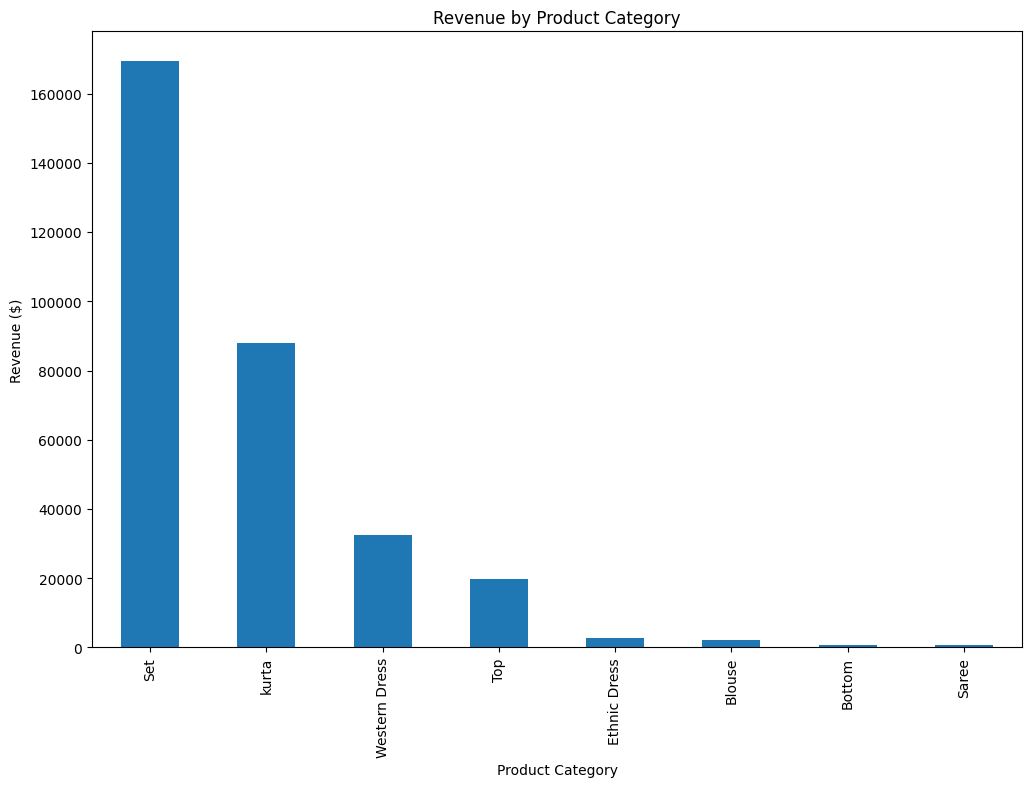

In [49]:
revenue_by_category = df.groupby('product_category')['order_amount_($)'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 8))
revenue_by_category.plot(kind='bar')
plt.title('Revenue by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Revenue ($)')
plt.show()

3. Top 5 Categories:


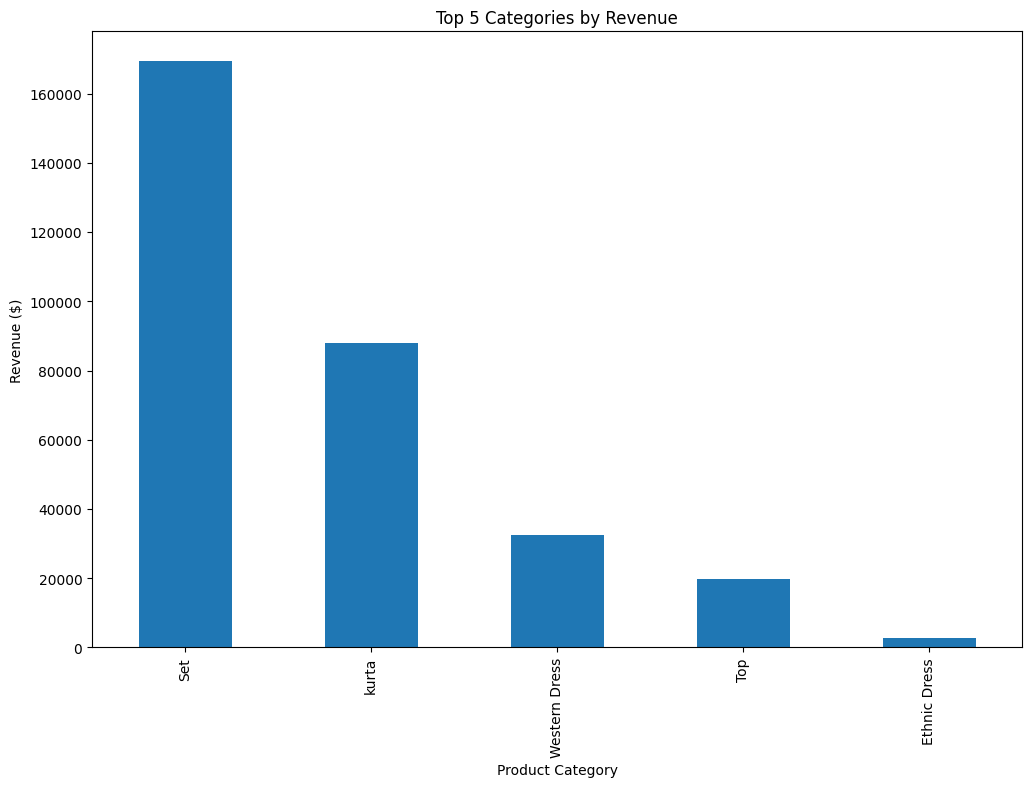

In [50]:
top5_categories = revenue_by_category.head(5)
plt.figure(figsize=(12, 8))
top5_categories.plot(kind='bar')
plt.title('Top 5 Categories by Revenue')
plt.xlabel('Product Category')
plt.ylabel('Revenue ($)')
plt.show()

4. Cancelled and Returned Items:

In [56]:
cancelled_returned_counts = df[df['ship_status'].isin(['Cancelled', 'Shipped - Returned to Seller'])].shape[0]

print("Number of Cancelled and Returned Items:", cancelled_returned_counts)


Number of Cancelled and Returned Items: 7318


5. Customer Type:

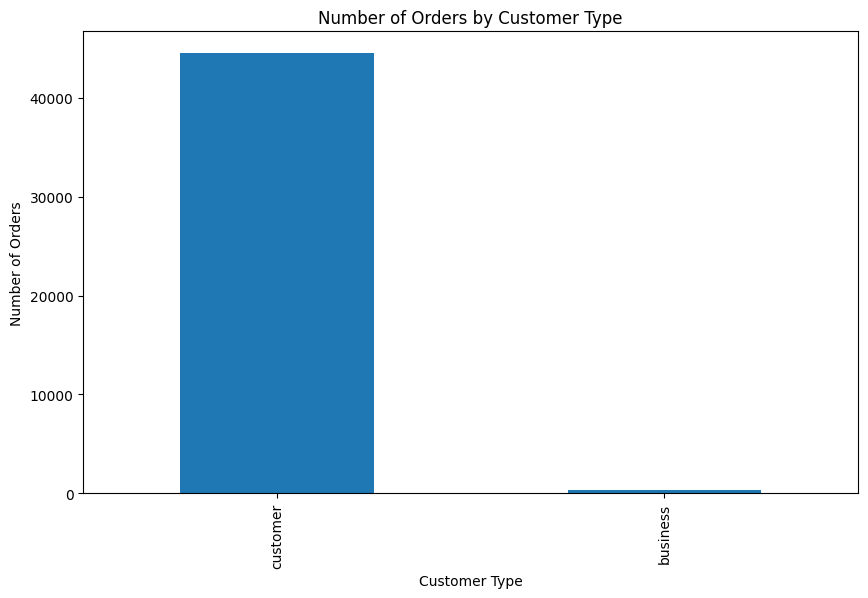

In [55]:
customer_type_counts = df['customer_type'].value_counts()
plt.figure(figsize=(10, 6))
customer_type_counts.plot(kind='bar')
plt.title('Number of Orders by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Number of Orders')
plt.show()

6. Top 5 Cities with Most Total Revenue:

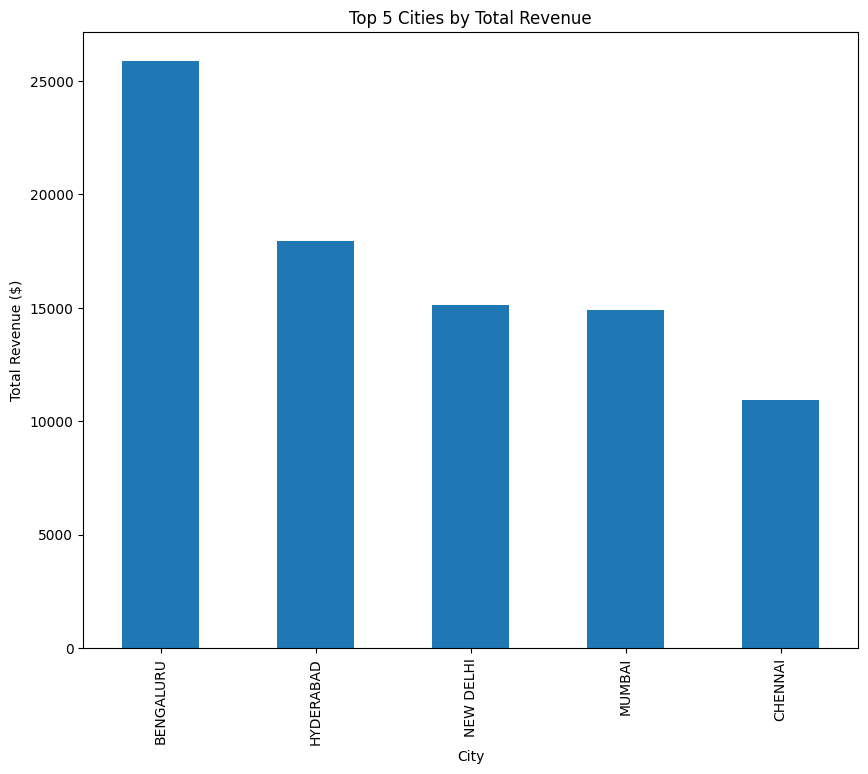

In [59]:
revenue_by_city = df.groupby('city')['order_amount_($)'].sum().sort_values(ascending=False)
top5_cities_revenue = revenue_by_city.head(5)
plt.figure(figsize=(10, 8))
top5_cities_revenue.plot(kind='bar')
plt.title('Top 5 Cities by Total Revenue')
plt.xlabel('City')
plt.ylabel('Total Revenue ($)')
plt.show()


7. Top 5 Cities with Most Order Quantity:


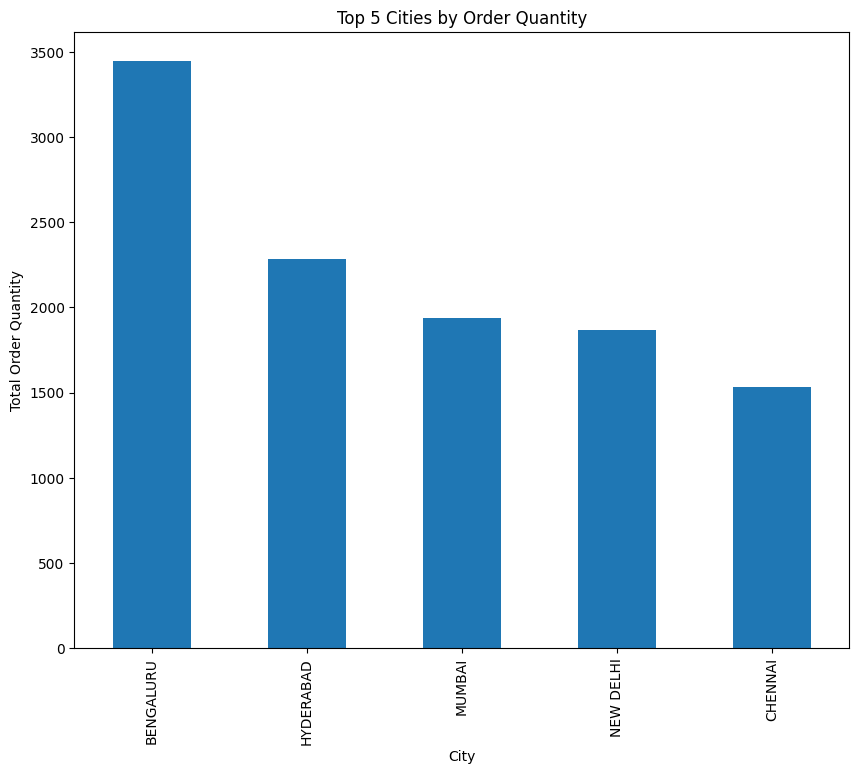

In [62]:
order_quantity_by_city = df.groupby('city')['order_quantity'].sum().sort_values(ascending=False)
top5_cities_order_quantity = order_quantity_by_city.head(5)
plt.figure(figsize=(10, 8))
top5_cities_order_quantity.plot(kind='bar')
plt.title('Top 5 Cities by Order Quantity')
plt.xlabel('City')
plt.ylabel('Total Order Quantity')
plt.show()
